# Advanced DataFrame handling

April 21, 2020

This code was written by @gucky92

It is a good example of how pandas `DataFrames` can be combined with `seaborn`

Data can be accessed here: https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

## Aligning countries by number of cases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv') # this is pandas function

In [27]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,555,607,665,714,784,840,906,933,996,1026
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,433,446,467,475,494,518,539,548,562,584
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,601,638,646,659,673,673,696,704,713,717
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,19,19,19,19,19,19,19,24,24,24
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,21,21,23,23,23,23,23,23,23,23
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,967,1013,1039,1067,1111,1159,1201,1248,1291,1339
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,103,103,102,103,103,103,103,103,103,103
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,2857,2857,2863,2870,2886,2897,2926,2926,2926,2926


It is good to use column names that are all lowercase and that can be identifiers (i.e. variable names)
(see here: https://www.programiz.com/python-programming/keywords-identifier)

In [28]:
longdf = df.rename(columns={'Country/Region':'country'}).set_index('country', drop=True)
#print('set new index:\n', longdf.head())
longdf

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.000000,65.000000,0,0,0,0,0,0,0,...,555,607,665,714,784,840,906,933,996,1026
Albania,NaN,41.153300,20.168300,0,0,0,0,0,0,0,...,433,446,467,475,494,518,539,548,562,584
Algeria,NaN,28.033900,1.659600,0,0,0,0,0,0,0,...,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718
Andorra,NaN,42.506300,1.521800,0,0,0,0,0,0,0,...,601,638,646,659,673,673,696,704,713,717
Angola,NaN,-11.202700,17.873900,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,24,24,24
Antigua and Barbuda,NaN,17.060800,-61.796400,0,0,0,0,0,0,0,...,21,21,23,23,23,23,23,23,23,23
Argentina,NaN,-38.416100,-63.616700,0,0,0,0,0,0,0,...,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941
Armenia,NaN,40.069100,45.038200,0,0,0,0,0,0,0,...,967,1013,1039,1067,1111,1159,1201,1248,1291,1339
Australia,Australian Capital Territory,-35.473500,149.012400,0,0,0,0,0,0,0,...,103,103,102,103,103,103,103,103,103,103


### Drop Unnecessary Columns

In [29]:
longdf = longdf.drop(columns=['Lat', 'Long', 'Province/State'])
longdf.columns.name = 'dates'  # all the columns correspond to dates now, so let's give columns a name
# this column name will show up later after stacking
#print('drop unnecessary columns:\n', longdf.head())
longdf

dates,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,555,607,665,714,784,840,906,933,996,1026
Albania,0,0,0,0,0,0,0,0,0,0,...,433,446,467,475,494,518,539,548,562,584
Algeria,0,0,0,0,0,0,0,0,0,0,...,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718
Andorra,0,0,0,0,0,0,0,0,0,0,...,601,638,646,659,673,673,696,704,713,717
Angola,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,24,24,24
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,21,21,23,23,23,23,23,23,23,23
Argentina,0,0,0,0,0,0,0,0,0,0,...,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941
Armenia,0,0,0,0,0,0,0,0,0,0,...,967,1013,1039,1067,1111,1159,1201,1248,1291,1339
Australia,0,0,0,0,0,0,0,0,0,0,...,103,103,102,103,103,103,103,103,103,103


### Stack

In [15]:
longdf = longdf.stack()
# let's give this new series a name
longdf.name = 'cases'
# this series name will show up later after reseting index
print('stack all columns -> creates pd.Series:\n', longdf.head())



stack all columns -> creates pd.Series:
 country      dates  
Afghanistan  1/22/20    0
             1/23/20    0
             1/24/20    0
             1/25/20    0
             1/26/20    0
Name: cases, dtype: int64


In [16]:
longdf = longdf.reset_index()
print('reset index -> creates pd.DataFrame in this case:\n', longdf.head())

reset index -> creates pd.DataFrame in this case:
        country    dates  cases
0  Afghanistan  1/22/20      0
1  Afghanistan  1/23/20      0
2  Afghanistan  1/24/20      0
3  Afghanistan  1/25/20      0
4  Afghanistan  1/26/20      0


In [17]:
print('check the datatypes in each column:\n', longdf.dtypes)

check the datatypes in each column:
 country    object
dates      object
cases       int64
dtype: object


Dates is an object and not a pandas datetime!!! -> we want to have pandas datetime. Luckily pandas has a nice functionality to infer datetimes

Let's reassign date and we want dates in units of days

In [18]:
longdf['dates'] = pd.to_datetime(longdf['dates']).astype('datetime64[D]')
print('check the datatypes in each column again:\n', longdf.dtypes)



check the datatypes in each column again:
 country            object
dates      datetime64[ns]
cases               int64
dtype: object


### Align Dates

In [19]:
# this is a very short example of how to use groupby 
# (there are many options of how to use it and what it can spit out, please look at the doc)
# let's align to the day of xth case
no_cases_exceeds = 10

def align_dates(df):
    
    # groupby will throw the dataframe at you with each groupby iteration for one country in this case
    # take the earliest date where cases exceeds a certain number
    min_date = (df['dates'][df['cases'] > no_cases_exceeds]).min()
    
    # subtract min_date to get alignment to no_cases_exceeds
    # assign this to a new column
    # and we just care about days with use the timedelta days attribute
    df['aligned_days'] = (df['dates'] - min_date).astype('timedelta64[D]')
    
    return df

# we get a new longdf with the an additional column called aligned_days
new_longdf = longdf.groupby('country').apply(align_dates)
print(new_longdf.head())

       country      dates  cases  aligned_days
0  Afghanistan 2020-01-22      0         -52.0
1  Afghanistan 2020-01-23      0         -51.0
2  Afghanistan 2020-01-24      0         -50.0
3  Afghanistan 2020-01-25      0         -49.0
4  Afghanistan 2020-01-26      0         -48.0


### Plot with seaborn

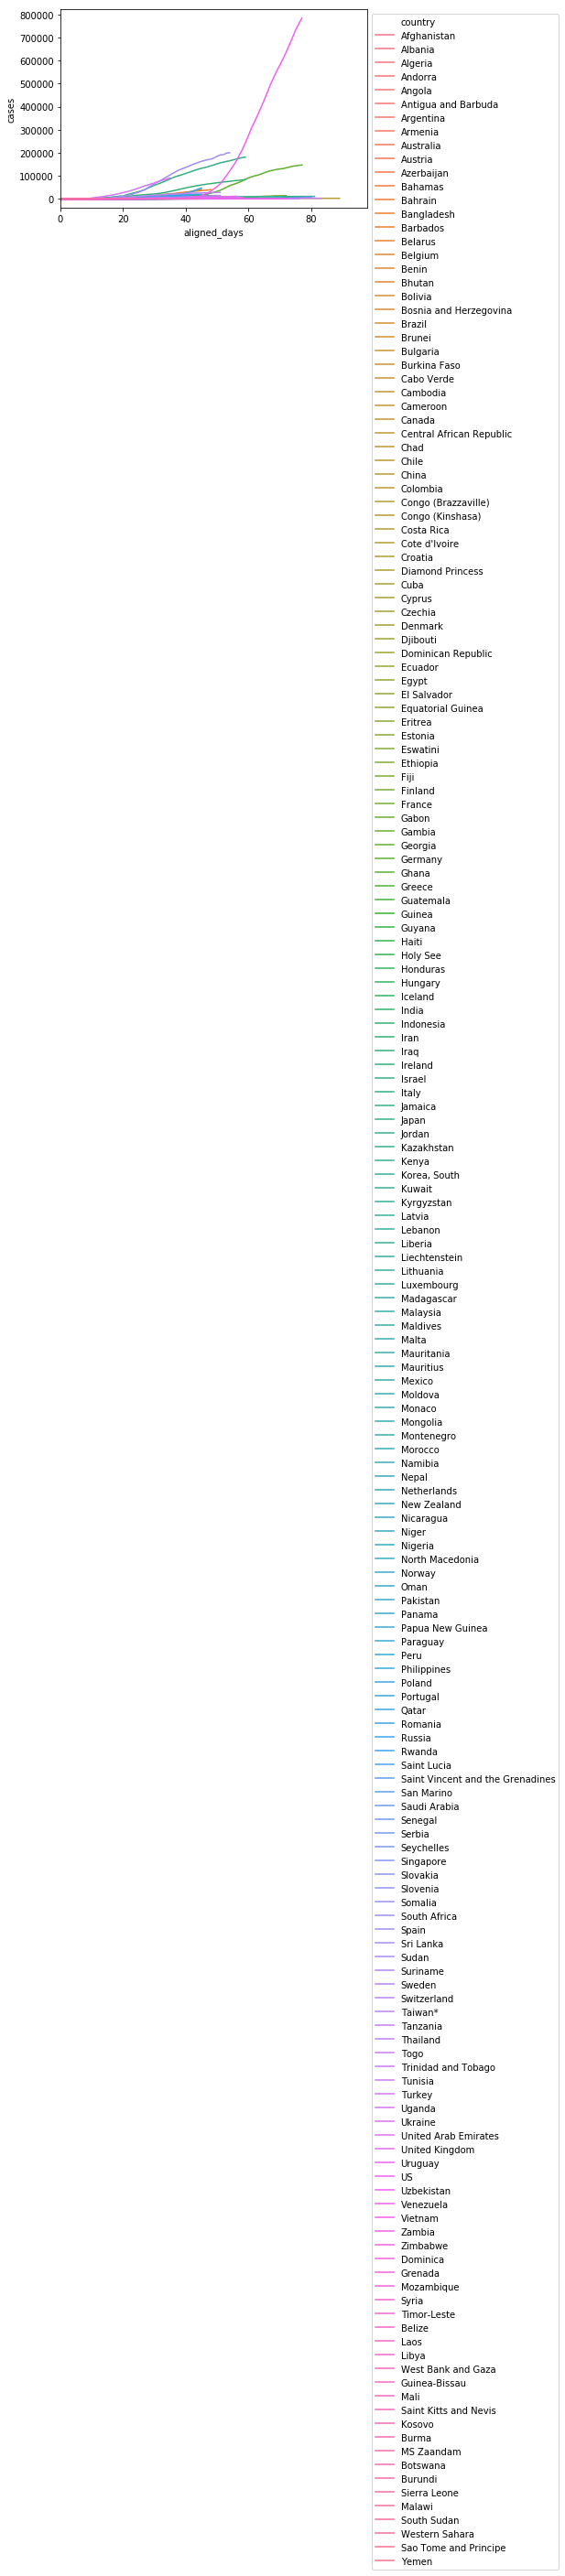

In [21]:
# now we can use seaborn simply to plot, seaborn loves this format
# since the legend is big there is also we can try to restrict to specific countries -> see below

ax = sns.lineplot(
    data=new_longdf, 
    x='aligned_days', 
    y='cases', 
    hue='country', 
    ci=None, 
)

xlims = ax.get_xlim()
ax.set_xlim(0, xlims[1])
# this anchors the legend to the side
ax.legend(bbox_to_anchor=(1,1))
plt.show()

### Plot a few countries

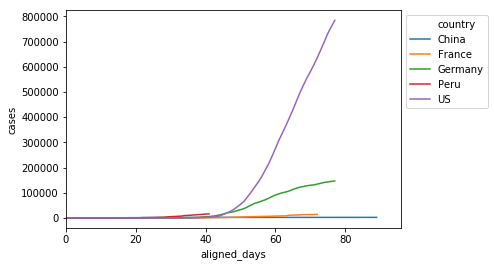

In [24]:
ax = sns.lineplot(
    data=new_longdf[new_longdf['country'].isin(['US', 'Germany', 'Peru', 'China', 'South Korea', 'France'])], 
    x='aligned_days', y='cases', 
    hue='country', ci=None, )

xlims = ax.get_xlim()
ax.set_xlim(0, xlims[1])
# this anchors the legend to the side
ax.legend(bbox_to_anchor=(1,1))
plt.show()

### Plot a few countries on a log scale

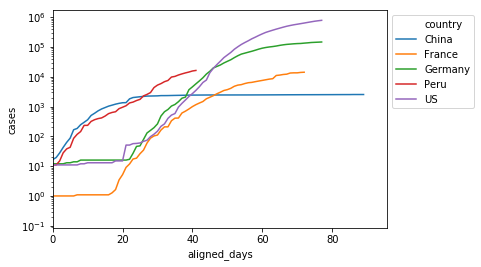

In [26]:
ax = sns.lineplot(
    data=new_longdf[new_longdf['country'].isin(['US', 'Germany', 'Peru', 'China', 'South Korea', 'France'])], 
    x='aligned_days', y='cases', 
    hue='country', ci=None, )

xlims = ax.get_xlim()
ax.set_xlim(0, xlims[1])
# this anchors the legend to the side
ax.legend(bbox_to_anchor=(1,1))
ax.set_yscale('log')

we could also group countries into regions (by adding a region column) and use 
`sns.FacetGrid` to plot multiple of these plots with just a couple lines. 
 